# CE-40717: Machine Learning

## HW7-Regression

### Please fill this part


1.   Full Name: Amirhossein Ramzani Bonab
2.   Student Number: 99210294

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./ML2021S-HW7-data.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
train_last_idx = int(0.8*len(dataset))

x_train = np.reshape(dataset.iloc[0:train_last_idx]['X'].to_numpy() , (-1, 1))
x_train = np.column_stack((x_train, np.ones(x_train.shape[0])))
y_train = dataset.iloc[0:train_last_idx]['Y'].to_numpy()

x_test = np.reshape(dataset.iloc[train_last_idx+1:]['X'].to_numpy() , (-1, 1))
x_test = np.column_stack((x_test, np.ones(x_test.shape[0])))
y_test = dataset.iloc[train_last_idx+1:]['Y'].to_numpy()

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

m = np.dot(np.linalg.pinv(np.dot(x_train.T , x_train)),np.dot(x_train.T , y_train))

In [4]:
predicted_train_y = m[0] * x_train[:,0] + m[1]
predicted_test_y = m[0] * x_test[:,0] + m[1]

train_error = np.mean((predicted_train_y - y_train)**2)
test_error = np.mean((predicted_test_y - y_test)**2)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.35312622484348566


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

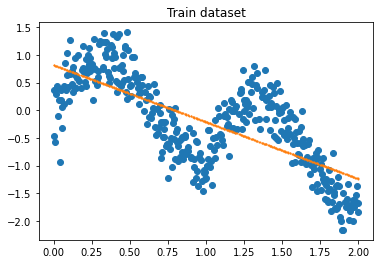

In [5]:
plt.scatter(x_train[:,0], y_train)
plt.scatter(x_train[:,0], m[0]*x_train[:,0] + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

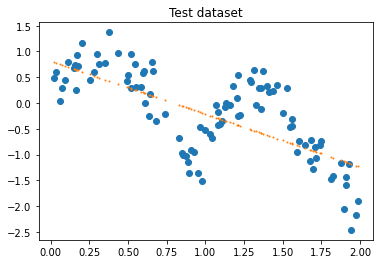

In [6]:
plt.scatter(x_test[:,0], y_test)
plt.scatter(x_test[:,0], m[0]*x_test[:,0] + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

* According to abilities of linear model, the reported accuracies are acceptible. Of course if we had a stronger model, we would reach better results. but the figures in the last cell show that the line that we have reached with linear regression, is the best linear fit to this data
* The last cell also shows that linear fit is not appropriate for given dataset and maybe polynomial fits give better results.
* The main problem is limitation of linear fit. higher dimension fits will give better results.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

* Looking at data, it is obvious that if we use locally weighted linear regression we will have better fit. thats because our data is somehow local that if we use near points to predict label of given point, it will produce more accurate label than linear regression. also because number of points in the dataset is much more that number of dimensions, LWLR will act very good. because if we look at the data, they are many points near each point in the dataset and this is good sign for using LWLR 

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-np.linalg.norm((xi - the_query_point)**2/(2*hyperparameter**2)))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    X = train_X
    qx = query_x
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.dot(np.linalg.pinv(np.dot(X.T , np.dot(W , X))) , np.dot(X.T , np.dot(W , train_Y)))

    return float(np.dot(qx, theta))

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
predicted_test = np.array([predict(x_train, y_train.reshape(-1,1), query, 0.1) for query in x_test])
error = np.mean((predicted_test - y_test)**2)
print(f"MSE test error: {error}")

MSE test error: 0.10697089276734936


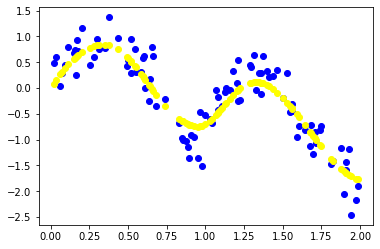

In [10]:
plt.scatter(x_test[:,0], y_test, c="blue")
plt.scatter(x_test[:,0], predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

* Yes. performance of the new model better than the previous one. because as i said in the last explanation, the localality of data causes LWLR to have a better result. as shown in figure above, the produced fit is very good fit and MSE test error approves this. as you see, the MSE error of the new model is 1/3 of previous linear regression simple model.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

* Yes. I think because data is spread well and we have appropirate density of points, KNN can work very well. 

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1 - x2)
        return distance

    def return_nn_ids(self, x):
        indices =  np.argsort((self.X - x)**2)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.mean((predicted_y - y_test)**2)
    return error, predicted_y

In [13]:
k = 20
error_knn, predicted_y = evaluation(k, x_train[:,0], y_train, x_test[:,0], y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09864464234595291


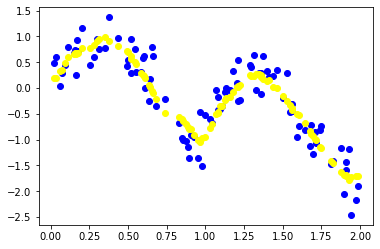

In [14]:
plt.scatter(x_test[:,0], y_test, c="blue")
plt.scatter(x_test[:,0], predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

* Yes. the accuracy of this model on test set is better that Linear Regression and also is slightly better than Locallcy Weighted Linear Regression and as shown in figure, the yellow curve is good fit on this data.  